# Sentinel-1 InSAR processing

This notebook provides an example to compute the geocoded InSAR coherence and the geocoded (flattened + terrain corrected + multilooked + filtered) interferogram on a user defined InSAR pairs

In [1]:
import openeo

import rasterio
from rasterio.plot import show

Create a datacube with the geocoded InSAR coherence and interferograms for a list of InSAR pairs

In [2]:
url = "https://openeo.dataspace.copernicus.eu"
connection = openeo.connect(url).authenticate_oidc()

datacube = connection.datacube_from_process(
    process_id="insar_interferogram_coherence",
    InSAR_pairs=[["2024-08-09", "2024-08-21"], ["2024-08-21", "2024-09-02"]],
    burst_id=249435,
    polarization="vv",
    sub_swath="IW2",
    coherence_window_az=2,
    coherence_window_rg=10,
    n_az_looks=1,
    n_rg_looks=4,
)

datacube = datacube.save_result(format='GTiff')

Authenticated using refresh token.


In [3]:
job = datacube.create_job(title='InSAR_coherence_interferogram')
job.start_and_wait()
job.get_results().download_files()

0:00:00 Job 'j-25062517480247df80a8da7ffe101771': send 'start'
0:00:12 Job 'j-25062517480247df80a8da7ffe101771': created (progress 0%)
0:00:18 Job 'j-25062517480247df80a8da7ffe101771': queued (progress 0%)
0:00:24 Job 'j-25062517480247df80a8da7ffe101771': queued (progress 0%)
0:00:32 Job 'j-25062517480247df80a8da7ffe101771': queued (progress 0%)
0:00:42 Job 'j-25062517480247df80a8da7ffe101771': queued (progress 0%)
0:00:54 Job 'j-25062517480247df80a8da7ffe101771': queued (progress 0%)
0:01:09 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:01:29 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:01:52 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:02:22 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:03:00 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:03:47 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:04:45 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)

Failed to parse API error response: [503] 'no available server\n' (headers: {'Content-Type': 'text/plain; charset=utf-8', 'X-Content-Type-Options': 'nosniff', 'Date': 'Wed, 25 Jun 2025 18:39:55 GMT', 'Content-Length': '20'})


0:51:52 Job 'j-25062517480247df80a8da7ffe101771': Service availability error while polling job status: [503] no available server

0:52:22 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:53:22 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:54:22 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:55:22 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:56:22 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:57:23 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:58:23 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
0:59:23 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
1:00:23 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
1:01:23 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
1:02:23 Job 'j-25062517480247df80a8da7ffe101771': running (progress N/A)
1:03:24 Job 'j-25062517480247df80a8da7ffe101771': running (progress

[PosixPath('/home/jovyan/mystorage/ClouDInSAR/demo/interferogram/openEO_2024-08-09Z.tif'),
 PosixPath('/home/jovyan/mystorage/ClouDInSAR/demo/interferogram/openEO_2024-08-21Z.tif'),
 PosixPath('/home/jovyan/mystorage/ClouDInSAR/demo/interferogram/job-results.json')]

# Visualization of the results

## 1) Visualization in the Jupyter notebook

Visualize the band names

In [4]:
with rasterio.open('openEO_2024-08-21Z.tif') as src:
    print(src.descriptions)

('Phase_ifg_VV', 'coh_VV')


Visualize the interferogram

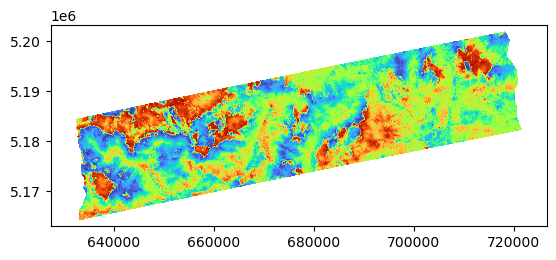

In [7]:
with rasterio.open('openEO_2024-08-21Z.tif') as src:
    show(src.read(1), transform=src.transform, cmap='turbo')

Visualize the InSAR coherence

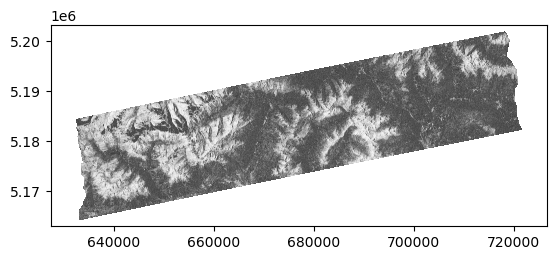

In [8]:
with rasterio.open('openEO_2024-08-21Z.tif') as src:
    show(src.read(2), transform=src.transform, cmap='gray')

## 2) Visualization in the openEO Web Editor

Open the [OpenEO Web Editor](https://openeo.dataspace.copernicus.eu/), search the job that has been executed and click on *View the results*

![image](openEO_webeditor.png)

## 3) Visualization in GIS software (QGIS)

Visualize the job result with job.get_results() and click on "Copy URL"

In [9]:
job.get_results()

<JobResults for job 'j-25062517480247df80a8da7ffe101771'>

Alternatively the URL can be directly visualized with `job.get_results().get_assets()`

In [10]:
job.get_results().get_assets()

[<ResultAsset 'openEO_2024-08-09Z.tif' (type image/tiff; application=geotiff) at 'https://openeo.dataspace.copernicus.eu/openeo/1.2/jobs/j-25062517480247df80a8da7ffe101771/results/assets/YjFkN2E3YzMtMGMxYi00MjgzLWE0NDItM2I1YmYxZmE4ZjNj/44d4c30db3039111c827ed76445772cb/openEO_2024-08-09Z.tif?expires=1751483510'>,
 <ResultAsset 'openEO_2024-08-21Z.tif' (type image/tiff; application=geotiff) at 'https://openeo.dataspace.copernicus.eu/openeo/1.2/jobs/j-25062517480247df80a8da7ffe101771/results/assets/YjFkN2E3YzMtMGMxYi00MjgzLWE0NDItM2I1YmYxZmE4ZjNj/c1332271b51153ca02353bd7b67c8fb5/openEO_2024-08-21Z.tif?expires=1751483510'>]

Then open QGIS. Click on *Open Data Source Manager* and select the protocol *HTTPS* as *Source Type*. Then paste the URL and add the layer

![image](qgis_visualization.png)